# Playing with Ellipses

$$
    \newcommand{\vect}[1]{\mathbf{#1}}
    \newcommand{\hypot}[2]{\sqrt{#1^2 + #2^2}}
$$

An ellipsis centered at the origin can be parameterized as
$$
    \vect{p} = \vect{a} \sin\theta + \vect{b} \cos\theta
$$
Where $\vect{a}$ and $\vect{b}$ are orthogonal to each other.

Thus, on the $y$ axis,
\begin{align\*}
    p_y &= a_y \sin\theta + b_y \cos\theta \\\\
        &= \hypot{a_y}{b_y} \Biggl( 
            \frac{a_y}{\hypot{a_y}{b_y}} \sin\theta + \frac{b_y}{\hypot{a_y}{b_y}} \cos\theta
        \Biggr)
\end{align\*}

Picking $\alpha$ such that $\displaystyle \cos\alpha = \frac{a_y}{\hypot{a_y}{b_y}}$ we then have
\begin{align\*}
    p_y &= \hypot{a_y}{b_y} ( \cos\alpha \sin\theta + \sin\alpha \cos\theta ) \\\\
        &= \hypot{a_y}{b_y} \sin(\alpha + \theta)
\end{align\*}

Solutions for the above are
$$
    \theta = \arcsin\Biggl( \frac{p_y}{\hypot{a_y}{b_y}} \Biggr) - \alpha + 2k\pi
    \quad \text{for $k$ in $\mathbb{Z}$}
$$
and
$$
    \theta = \pi - \arcsin\Biggl( \frac{p_y}{\hypot{a_y}{b_y}} \Biggr) - \alpha + 2k\pi 
    \quad \text{for $k$ in $\mathbb{Z}$}
$$

In [1]:
%pylab inline
import ipywidgets
figsize(10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#         double ay = a.y;
#         double by = b.y;

#         if ((ay*ay + by*by) < 0.0) {
#             return {0.0, 0.0};
#         }

#         double alpha = acos(ay / sqrt(ay*ay + by*by));
#         double theta = asin((y-circle_center.y)/sqrt(ay*ay + by*by));
#         double theta1 = theta - alpha;
#         double theta2 = M_PI - theta - alpha;

#         double z1 = circle_center.z + radius*(sin(theta1)*a.z + cos(theta1)*b.z);
#         double z2 = circle_center.z + radius*(sin(theta2)*a.z + cos(theta2)*b.z);
        
def find_z(ay, by, cy, y, az, bz, cz):
    alpha = arccos(ay / sqrt(ay*ay + by*by))
    theta = arcsin(  (y - cy) / sqrt(ay*ay + by*by)  )
    theta1 = theta - alpha
    theta2 = pi - theta - alpha
    
    z1 = cz + az*sin(theta1) + bz*cos(theta1)
    z2 = cz + az*sin(theta2) + bz*cos(theta2)
    return z1, z2


In [3]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = asarray(axis)
    axis = axis/sqrt(dot(axis, axis))
    a = cos(theta/2.0)
    b, c, d = -axis*sin(theta/2.0)
    aa, bb, cc, dd = a*a, b*b, c*c, d*d
    bc, ad, ac, ab, bd, cd = b*c, a*d, a*c, a*b, b*d, c*d
    return np.array([[aa+bb-cc-dd, 2*(bc+ad), 2*(bd-ac)],
                     [2*(bc-ad), aa+cc-bb-dd, 2*(cd+ab)],
                     [2*(bd+ac), 2*(cd-ab), aa+dd-bb-cc]])

def euler_rotate(rx, ry, rz):
    return rotation_matrix([1, 0, 0], rx) @ rotation_matrix([0, 1, 0], ry) @ rotation_matrix([0, 0, 1], rz)

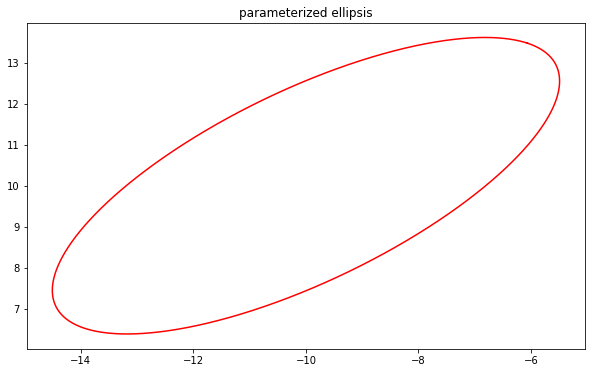

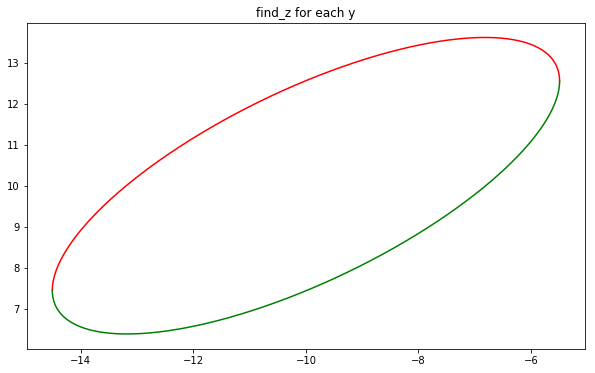

In [4]:
# @ipywidgets.interact(rx=(0, 2*pi, 0.01),
#                      ry=(0, 2*pi, 0.01), 
#                      rz=(0, 2*pi, 0.01))
def go(rx=.52, ry=.84, rz=.28):
    ax, ay, az = [0, 3, 0] @ euler_rotate(rx, ry, rz)
    bx, by, bz = [0, 0, 6] @ euler_rotate(rx, ry, rz)
    cx, cy, cz = 0, -10, 10

    theta = arange(0, 2*pi, 0.001)
    y = cy + ay*sin(theta) + by*cos(theta)
    z = cz + az*sin(theta) + bz*cos(theta)
    plot(y, z, 'r')
    title('parameterized ellipsis')
    show()

    y = linspace(min(y), max(y), 10000)
    zb = find_z(ay, by, cy, y, az, bz, cz)[0]
    ze = find_z(ay, by, cy, y, az, bz, cz)[1]
    plot(y, zb, 'r', y, ze, 'g')
    title('find_z for each y')
    show()
    
go()